In [14]:
%pip install numpy requests torch transformers
%pip install huggingface_hub[hf_xet]

  Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.3-cp313-cp313-win_amd64.whl (12.8 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'c:\\Users\\medhi\\SourceCode\\AISeminar\\.venv\\Lib\\site-packages\\numpy\\fft\\_pocketfft_umath.cp313-win_amd64.pyd'
Check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [15]:
from PIL import Image
import numpy as np
import requests
import torch

from transformers import DPTImageProcessor, DPTForDepthEstimation

In [ ]:
image_processor = DPTImageProcessor.from_pretrained("Intel/dpt-hybrid-midas")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-hybrid-midas", low_cpu_mem_usage=True)


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 3603.35it/s]
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Error while downloading from https://huggingface.co/Intel/dpt-hybrid-midas/resolve/refs%2Fpr%2F8/model.safetensors: HTTPSConnectionPool(host='cas-bridge.xethub.hf.co', port=443): Read timed out.
Trying to resume download...


In [22]:
url = "https://www.astemo.com/en/assets/images/corporate/thumb_corporate09.jpg"
url = "https://media.licdn.com/dms/image/v2/D4E22AQGIpIqIHJlZtw/feedshare-shrink_800/feedshare-shrink_800/0/1693908090514?e=2147483647&v=beta&t=VRWCKRi681Uva7bDhOIlT-vHQuLfmtWMO-v5pzs6Too"
image = Image.open(requests.get(url, stream=True).raw)

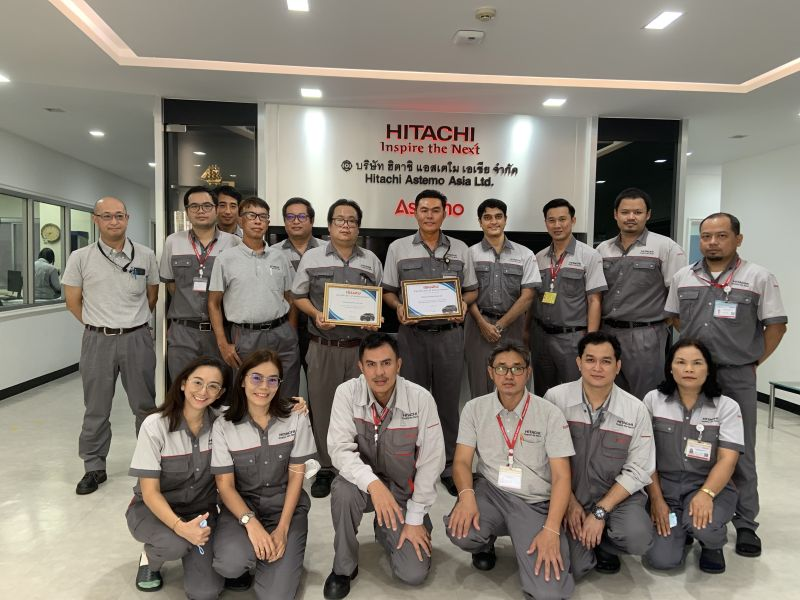

In [23]:
image

In [24]:
# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

In [25]:
# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)

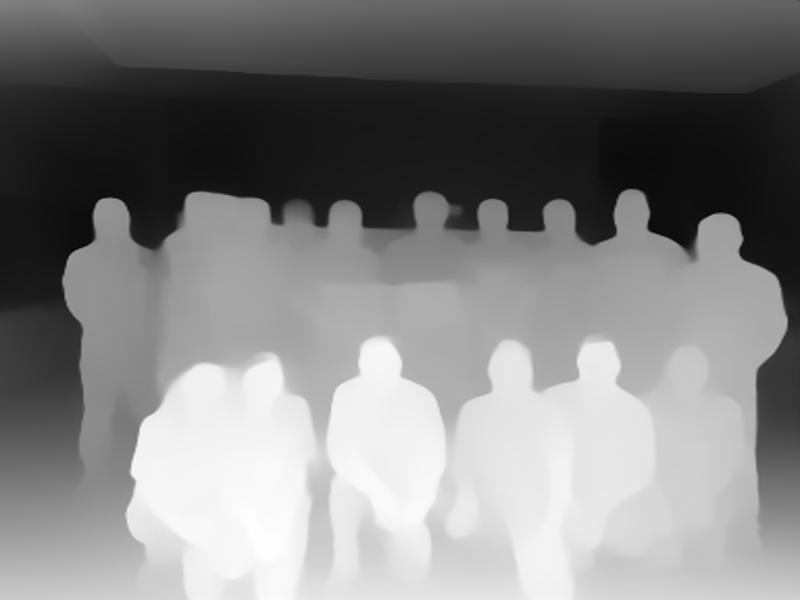

In [26]:
depth